In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)


In [2]:
# Load datasets
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

# Combine datasets
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Separate features and labels
X_combined = combined_df.drop('label', axis=1)
y_combined = combined_df['label']

# ----> Handle NaN values in 'y_combined' <----
y_combined = y_combined.fillna(y_combined.median()) # Replace NaN with median
# or you could drop rows with NaN
# combined_df.dropna(subset=['label'], inplace=True)
# X_combined = combined_df.drop('label', axis=1)
# y_combined = combined_df['label']

# Preprocessing pipeline for features
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())  # Standardize features
])

# Apply preprocessing to features
X_processed = preprocessing_pipeline.fit_transform(X_combined)

# Normalize (0-1 scaling)
X_processed = X_processed / 255.0

# Apply PCA (Retaining 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_processed)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

In [3]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy"),
    'Naive Bayes': GaussianNB(),
    'ANN': MLPClassifier(max_iter=1000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.3f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.854
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1381
           1       0.78      0.98      0.87      1575
           2       0.91      0.80      0.85      1398
           3       0.80      0.84      0.82      1428
           4       0.87      0.88      0.88      1365
           5       0.88      0.70      0.78      1263
           6       0.90      0.92      0.91      1375
           7       0.89      0.89      0.89      1459
           8       0.84      0.75      0.79      1365
           9       0.81      0.82      0.82      1391

    accuracy                           0.85     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.85      0.85     14000

[[1284    2    7    5    5   25   26    0   16   11]
 [   0 1537    5    5    0    6    7    1   11    3]
 [  27   68 1115   43   29    3   43   23   42    5]
 [   8   40   45 1206    2   29   12   28   44

Tuned ANN Accuracy: 0.892
Best Parameters: {'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001}

Classification Report for Tuned ANN:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1381
           1       0.93      0.97      0.95      1575
           2       0.89      0.85      0.87      1398
           3       0.87      0.85      0.86      1428
           4       0.89      0.88      0.89      1365
           5       0.86      0.85      0.86      1263
           6       0.91      0.94      0.92      1375
           7       0.91      0.91      0.91      1459
           8       0.87      0.83      0.85      1365
           9       0.84      0.88      0.86      1391

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



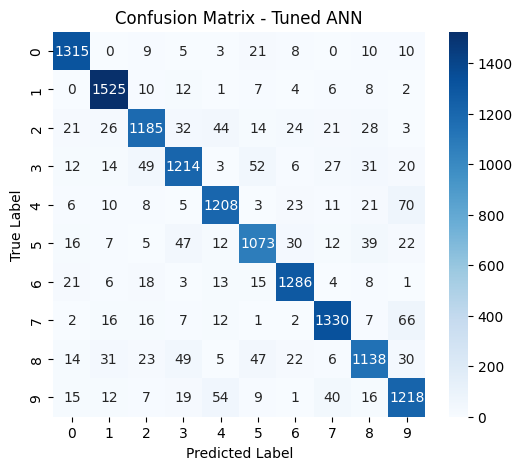

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(128,), (64, 64)],
    'learning_rate_init': [0.0005, 0.001]
}

# GridSearchCV for ANN
grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train[:5000], y_train[:5000])  # Subset for speed

# Get the best model
best_ann = grid_search.best_estimator_

# Make predictions
y_pred_tuned = best_ann.predict(X_test)

# Store accuracy
results['Tuned ANN'] = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned ANN Accuracy: {results["Tuned ANN"]:.3f}')
print(f'Best Parameters: {grid_search.best_params_}')

# Print Classification Report
print("\nClassification Report for Tuned ANN:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned ANN")
plt.show()


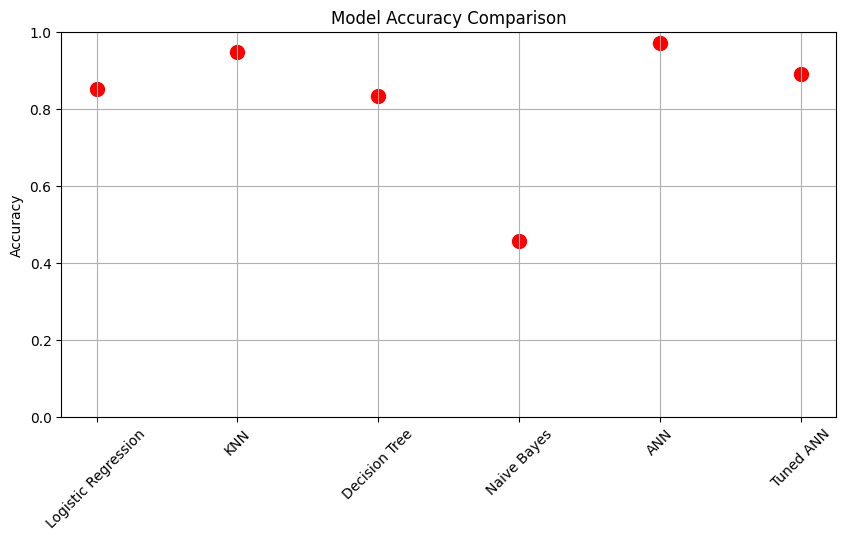

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(results.keys(), results.values(), color='red', s=100)  # 's' controls marker size
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


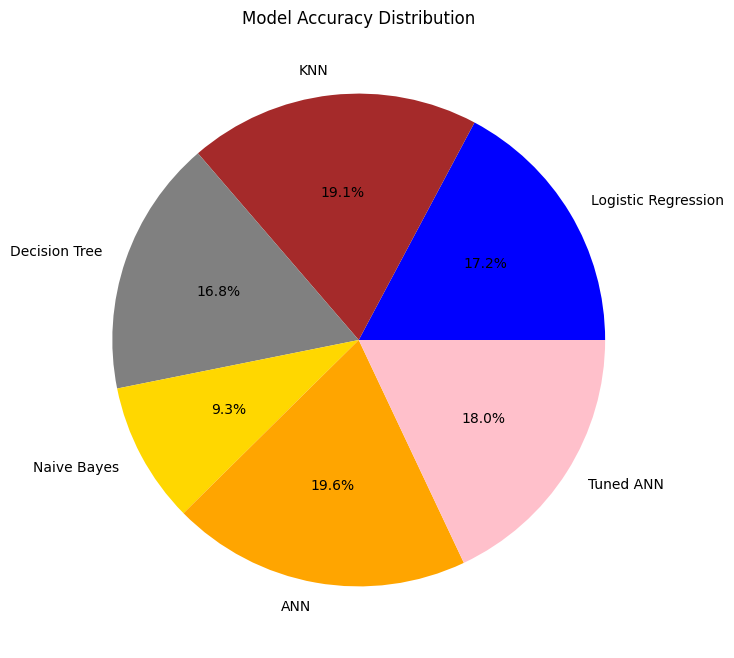

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(results.values(), labels=results.keys(), autopct='%1.1f%%', colors=['blue', 'brown', 'gray', 'gold', 'orange','pink'])
plt.title('Model Accuracy Distribution')
plt.show()